Stock Market Prediction and Forecasting Using Stacked LSTM

Dataset
Yahoo Finance - Stock of Reliance Industries Limited NSE: RELIANCE: https://finance.yahoo.com/quote/RELIANCE.NS/history?period1=1433635200&period2=1591488000&interval=1d&filter=history&frequency=1d


In [ ]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()





Saving Reliance_Stock.csv to Reliance_Stock.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['Reliance_Stock.csv']))

In [ ]:
#Import the data and remove rows containing NAN values
df = pd.read_csv('stock_data.csv')
df = df.dropna()
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1224,2020-06-01,1480.0,1538.349976,1475.949951,1520.349976,1520.349976,18434012.0
1225,2020-06-02,1526.0,1540.000000,1520.800049,1535.699951,1535.699951,10224049.0
1226,2020-06-03,1545.0,1560.000000,1533.349976,1541.650024,1541.650024,11713461.0
1227,2020-06-04,1544.0,1589.500000,1541.000000,1579.800049,1579.800049,15784379.0
1228,2020-06-05,1595.0,1618.000000,1573.699951,1581.699951,1581.699951,15246965.0


In [ ]:
df_close = df['Close']


In [ ]:
df_close.shape

(1229,)

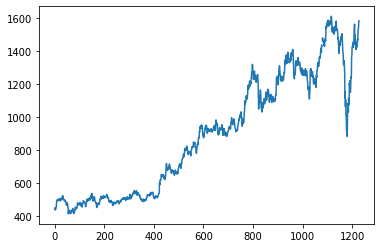

In [ ]:
plt.plot(df_close)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close.shape


(1229, 1)

In [ ]:
df_close


array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

In [ ]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 13s 398ms/step - loss: 0.0506 - val_loss: nan
Epoch 2/100
13/13 [==============================] - 4s 331ms/step - loss: 0.0074 - val_loss: nan
Epoch 3/100
13/13 [==============================] - 4s 331ms/step - loss: 0.0028 - val_loss: nan
Epoch 4/100
13/13 [==============================] - 4s 330ms/step - loss: 0.0012 - val_loss: nan
Epoch 5/100
13/13 [==============================] - 4s 330ms/step - loss: 0.0010 - val_loss: nan
Epoch 6/100
13/13 [==============================] - 4s 332ms/step - loss: 0.0010 - val_loss: nan
Epoch 7/100
13/13 [==============================] - 4s 333ms/step - loss: 9.8505e-04 - val_loss: nan
Epoch 8/100
13/13 [==============================] - 4s 333ms/step - loss: 9.7673e-04 - val_loss: nan
Epoch 9/100
13/13 [==============================] - 4s 332ms/step - loss: 9.4051e-04 - val_loss: nan
Epoch 10/100
13/13 [==============================] - 4s 330ms/step - loss: 9.0082e-04 - val_loss: nan
Ep

In [ ]:
len(test_data), x_test.shape

(308, (207, 100, 1))

In [ ]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

796.739533203873

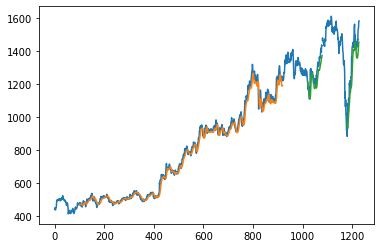

In [ ]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data), x_test.shape

(308, (207, 100, 1))

In [ ]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.91118463 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079
 0.76463703 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139
 0.5851654  0.6181313  0.5423683  0.57776065 0.50279251 0.49634993
 0.46330038 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473
 0.54504569 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854
 0.6620997  0.65042781 0.67368794 0.64791772 0.61503546 0.63026342
 0.67707661 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924
 0.84922714 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165
 0.86368529 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482
 0.85441462 0.87403524 0.85843081 0.83178201 0.85253205 0.85884916
 0.85073323 0.844458   0.862447   0.88478678 0.87821873 0.92503192
 0.9378752  0.94285362 0.97477365 0.97636329 0.90367293 0.90434194
 0.89465261 0.87852991 0.85840398 0.83648211 0.81377506 0.79086459
 0.76816761 0.74602813 0.72473735 0.7045337  0.68559802 0.66805243
 0.65196353 0.63734591 0.62417126 0.61237633 0.601

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [ ]:
len(df_close)

1229

ValueError: ignored

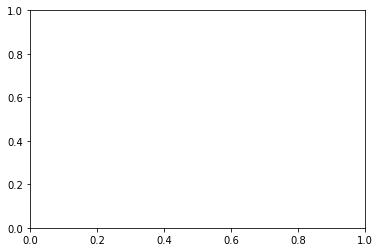

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))